# Data Checks

Quick overview data checks and explorations for a session Treasure Hunt data.

In [10]:
%config Completer.use_jedi = False

In [16]:
from pathlib import Path
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from pynwb import NWBHDF5IO

# Import spike related utilities from spiketools
from spiketools.measures import compute_spike_rate
from spiketools.spatial.occupancy import compute_occupancy

from spiketools.plts.space import plot_heatmap
from spiketools.plts.spikes import plot_unit_frs
from spiketools.plts.trials import plot_rasters

In [12]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [17]:
# Set which task to analyze
task = 'THF'

In [18]:
# Define the base data folder
data_folder = Path('/Users/tom/Documents/Data/JacobsLab/TH/' + task)

In [24]:
# Define subject information
subj = 'wv001'
session = 0

In [25]:
# Define bins to use
bins = [7, 21]

## Load NWB Data

In [26]:
# Define expected NWB file name & full path
file_name = '_'.join([subj, 'session_' + str(session)]) + '.nwb'
full_path = data_folder / 'NWB' / file_name

In [27]:
# Load NWB file
io = NWBHDF5IO(str(full_path), 'r')
nwbfile = io.read()

In [7]:
# Check the NWBfile contents
nwbfile

root pynwb.file.NWBFile at 0x140641152613968
Fields:
  acquisition: {
    chest_positions <class 'pynwb.behavior.Position'>,
    chest_stimuli <class 'pynwb.behavior.Position'>,
    chest_trials <class 'pynwb.behavior.Position'>,
    position <class 'pynwb.behavior.Position'>
  }
  data_collection: West Virginia
  devices: {
    Microwire Electrodes <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    A-microwires-chnum <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: This file contains a recorded session of the Treasure Hunt task, a spatial-navigation memory task. The subject is a clinical patient with intractable epilepsy undergoing pre-surgical mapping in an epilepsy monitoring unit, with implants including Behnke-Fried microwires.
  experimenter: ['XX']
  file_create_date: [datetime.datetime(2021, 12, 14, 3, 22, 37, 299181, tzinfo=tzoffset(None, -18000))]
  identifier: XX
  institution: Col

## Position Data

In [7]:
# Extract the position data
pos = nwbfile.acquisition['position']['xy_position']
pos

xy_position pynwb.behavior.SpatialSeries at 0x140225604165248
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (2, 43082), type "<f8">
  description: XY position of the subject along the track.
  interval: 1
  reference_frame: middle
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (43082,), type "<f8">
  timestamps_unit: seconds
  unit: meters

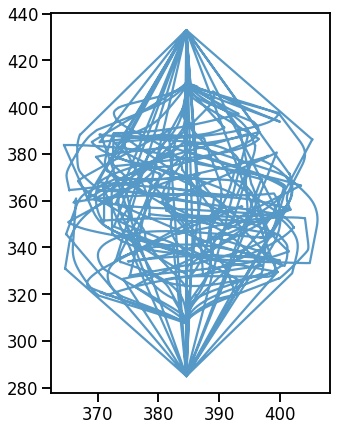

In [8]:
# Plot the map across all position traces
_, ax = plt.subplots(figsize=(5, 7))
ax.plot(*pos.data, alpha=0.75)

In [9]:
# Extract position data
x_data = pos.data[0, :]
y_data = pos.data[1, :]

In [10]:
# Check position ranges
print('x data range: {:6.2f} - {:6.2f}'.format(np.min(x_data), np.max(x_data)))
print('y data range: {:6.2f} - {:6.2f}'.format(np.min(y_data), np.max(y_data)))

x data range: 364.48 - 406.14
y data range: 285.00 - 433.00


In [11]:
# Get speed
# TODO: 
#speed = nwbfile.processing['position_measures']['speed'].data[:]

# TEMP: hack speed (not currently added to file properly)
speed = np.ones(len(pos.timestamps))

## Occupancy

In [12]:
# Compute occupancy values
occ = compute_occupancy(pos.data[:], pos.timestamps[:], bins, speed, set_nan=True)

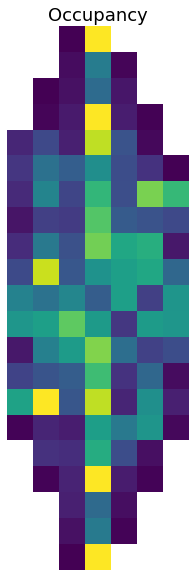

In [13]:
# Plot the occupancy
plot_heatmap(occ, transpose=True, title="Occupancy", vmax=25, figsize=(10, 10))

## Stimuli

In [14]:
# Collect chest positions
chest_pos = nwbfile.acquisition['chest_positions']
chest_xs, chest_ys = chest_pos['chest_positions'].data[:]

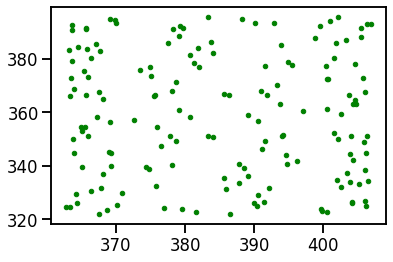

In [15]:
# Plot all chest positions
plt.plot(chest_xs, chest_ys, '.g')

In [16]:
# Collect and check which trial each trial is in
chest_trials = nwbfile.acquisition['chest_trials']
chest_trials = chest_trials['chest_trials'].data[:]
chest_trials

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16,
       17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25,
       25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29,
       29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33,
       34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38,
       38, 38, 38, 39, 39, 39, 39])

In [17]:
# Collect and check which stimulus each chest contains
chest_stim = nwbfile.acquisition['chest_stimuli']
chest_stim = chest_stim['chest_stimuli'].data[:]
chest_stim

array([  7,   2,   0,   6,  34,  10,   0,   0,   0,  16,  17,  43,  44,
         0,  40,   0,  35,   0,  30,   0,   0,  26,  21,  23,  28,   0,
        50,   0,   9,   0,  48,  20,   5,  12,   0,  25,  31,   0,  18,
         0,  42,  14,   0,  33,   4,   0,  39,   0,  46,   0,  15,  24,
        38,  45,   0,   0,   0,  36,  49,  27,  29,  19,   0,   0,  22,
         3,   0,   0,  13,   0,  11,   0,   0,  41,  47,  37,   1,   8,
         0,  32,   0,  67,  88,  61,  86,  75,   0,   0,  90,  55,   0,
        94,  60,  80,   0,   0,  74,  64,   0,  73,  71,   0,  91,   0,
        76,  68,   0,  99,  83,   0,  96,   0,  66,   0,  72,  97,  79,
         0,  92,   0,   0,  93,  59,   0,  65,  84,   0,  57,  95,   0,
        56,  62,  54,   0,  53,   0,  77,   0,  82,   0,  87,  63,   0,
        85,   0,  58, 100,  78,   0,  69,  81,   0,  52,   0,  51,   0,
        70,  98,   0,  89])

## Trials

In [18]:
# Check the data available in the NWB trials section
nwbfile.trials

trials pynwb.epoch.TimeIntervals at 0x140225604335744
Fields:
  colnames: ['start_time' 'stop_time' 'num_chests' 'num_treasures' 'chest_opening'
 'response']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    num_chests <class 'hdmf.common.table.VectorData'>,
    num_treasures <class 'hdmf.common.table.VectorData'>,
    chest_opening <class 'hdmf.common.table.VectorData'>,
    response <class 'hdmf.common.table.VectorData'>
  )
  description: experimental trials
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [19]:
# Check the number of trials in the dataset
n_trials = len(nwbfile.trials)
print('Number of trials: {}'.format(n_trials))

Number of trials: 39


In [20]:
# Get the trial information as a dataframe
behav = nwbfile.trials.to_dataframe()
behav.head()

,start_time,stop_time,num_chests,num_treasures,chest_opening,response
id,,,,,,
0,1.623665e+12,1.623665e+12,4,3,"[1623664571515.4434, 1623664575519.4717, 16236...","[1623664598973.637, 1623664601431.6543, 162366..."
1,1.623665e+12,1.623665e+12,4,2,"[1623664619899.7844, 1623664623975.8132, 16236...","[1623664651575.0078, 1623664658663.0579, 0.0]"
2,1.623665e+12,1.623665e+12,4,3,"[1623664670064.1382, 1623664675479.1763, 16236...","[1623664699003.3423, 1623664706570.3955, 16236..."
3,1.623665e+12,1.623665e+12,4,2,"[1623664725325.5278, 1623664729435.557, 162366...","[1623664757235.753, 1623664759893.7715, 0.0]"
4,1.623665e+12,1.623665e+12,4,2,"[1623664773607.8682, 1623664778363.9019, 16236...","[1623664808467.114, 1623664811253.1338, 0.0]"


## Check Unit Data

In [21]:
# Check the data available in the NWB units section
nwbfile.units

units pynwb.misc.Units at 0x140225604336752
Fields:
  colnames: ['channel' 'spike_times' 'electrodes']
  columns: (
    channel <class 'hdmf.common.table.VectorData'>,
    spike_times_index <class 'hdmf.common.table.VectorIndex'>,
    spike_times <class 'hdmf.common.table.VectorData'>,
    electrodes_index <class 'hdmf.common.table.VectorIndex'>,
    electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  )
  description: Autogenerated by NWBFile
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  waveform_unit: volts

In [22]:
# Check how many units are available
n_units = len(nwbfile.units)
print('Number of units: {}'.format(n_units))

Number of units: 93


In [23]:
# Check the total number of spikes
print('Total number of spikes: {}'.format(nwbfile.units.spike_times.shape[0]))

Total number of spikes: 348524


In [24]:
# Calculate the average overall firing rate of each neuron
rates = [compute_spike_rate(nwbfile.units.get_unit_spike_times(s_ind) / 1000000) \
         for s_ind in range(n_units)]

In [25]:
# Count the number of units per wire
channel_counts = Counter(nwbfile.units.channel[:])
counts_per_wire = Counter(channel_counts.values())

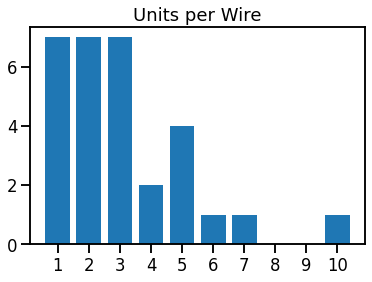

In [26]:
# Plot the distribution of units per wire
plt.bar(counts_per_wire.keys(), counts_per_wire.values())
plt.xticks(list(range(min(counts_per_wire.keys()), max(counts_per_wire.keys()) + 1)));
plt.title('Units per Wire');

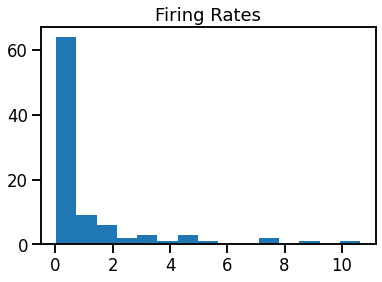

In [27]:
# Check a histogram of the firing rates
plt.hist(rates, bins=15);
plt.title('Firing Rates');

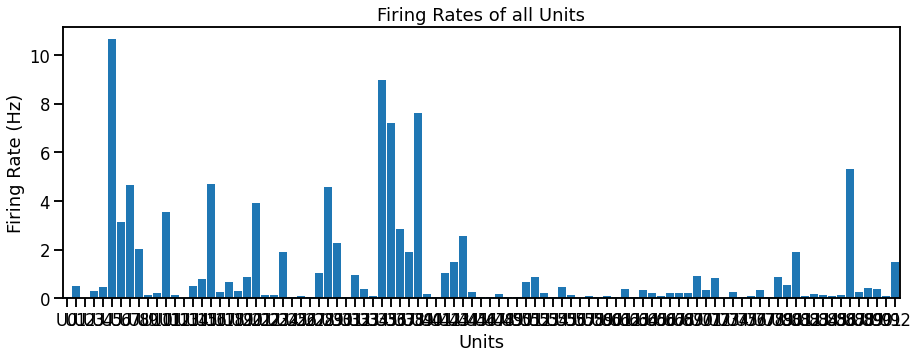

In [28]:
# Plot approximate firing rate for each unit
plot_unit_frs(rates, figsize=(15, 5))

In [29]:
# Get the time range of spike activity
first_spike = np.min(nwbfile.units.spike_times[:])
last_spike = np.max(nwbfile.units.spike_times[:])
dur = last_spike - first_spike

In [30]:
# Collect session normalized spiking activity across all units
all_spikes = []
for uind in range(n_units):
    spikes = nwbfile.units.get_unit_spike_times(uind)# - first_spike
    all_spikes.append(spikes / 1000)

In [31]:
st, en = nwbfile.trials.start_time[0], nwbfile.trials.stop_time[-1]

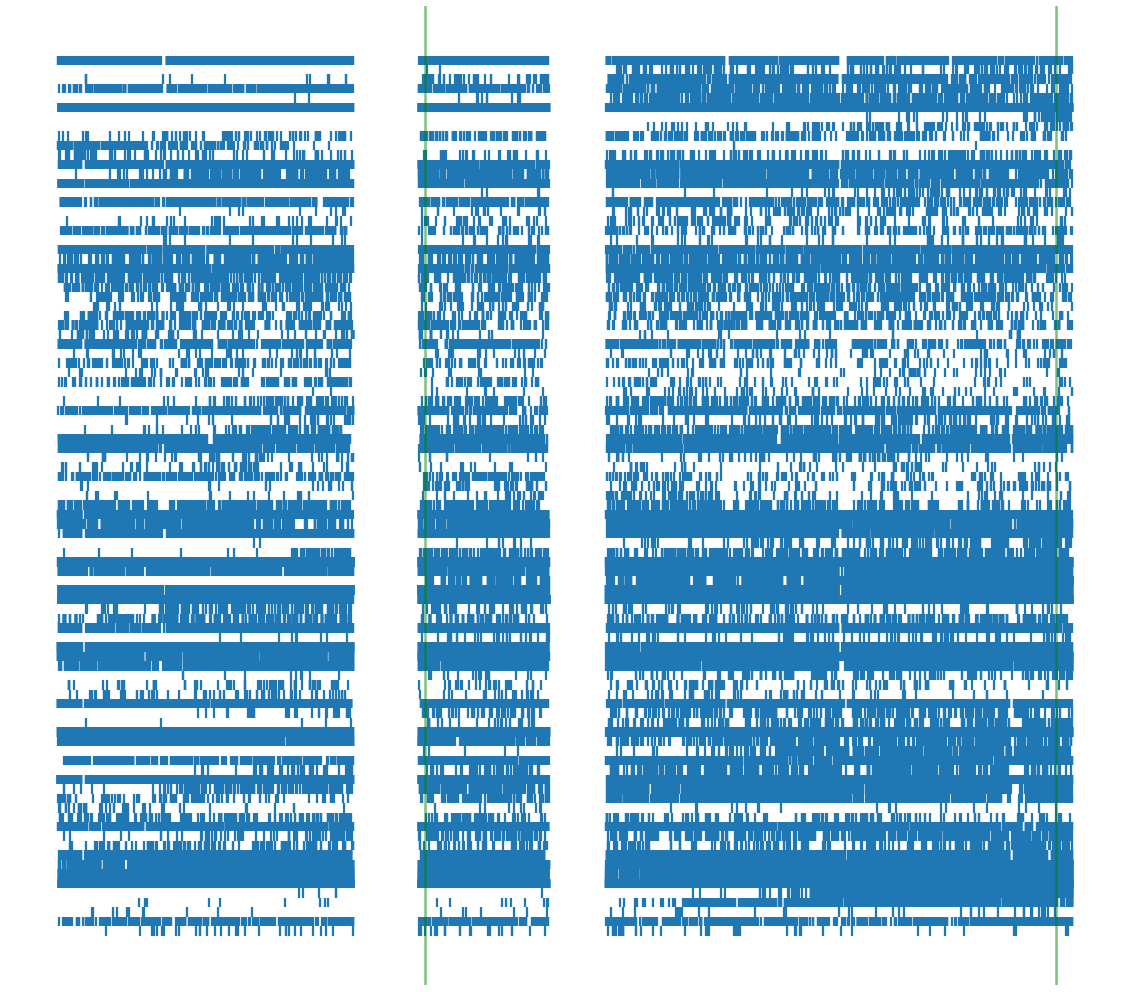

In [32]:
# Plot the session-level raster plot across all units together
plot_rasters(all_spikes, vline=[st, en], figsize=(20, 18),
             #xlim=[0, dur/1000], ylim=[-1, 81]
            )

In [33]:
# # Print out the whole-session spike raster for each neuron separately
# for uind in range(n_units):
#     spikes = nwbfile.units.get_unit_spike_times(uind) - first_spike
#     plt.figure()
#     plt.eventplot(spikes / 1000)
#     plt.xlim(0, dur/1000)